In [86]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [87]:
df = pd.read_csv('heart_v2.csv')

In [88]:
print(df.shape)
df.info()

(270, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [89]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [90]:
df.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

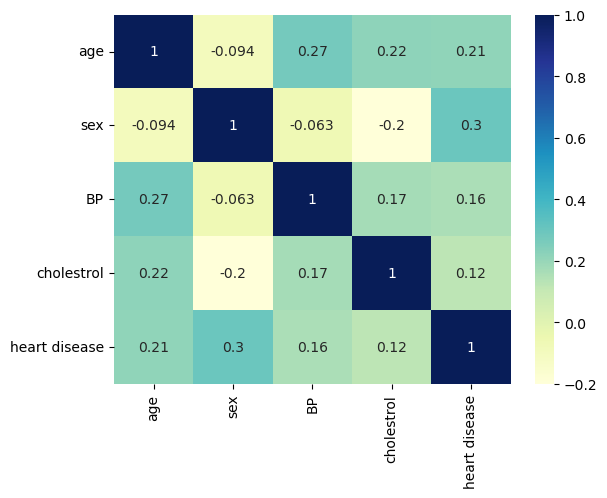

In [92]:
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

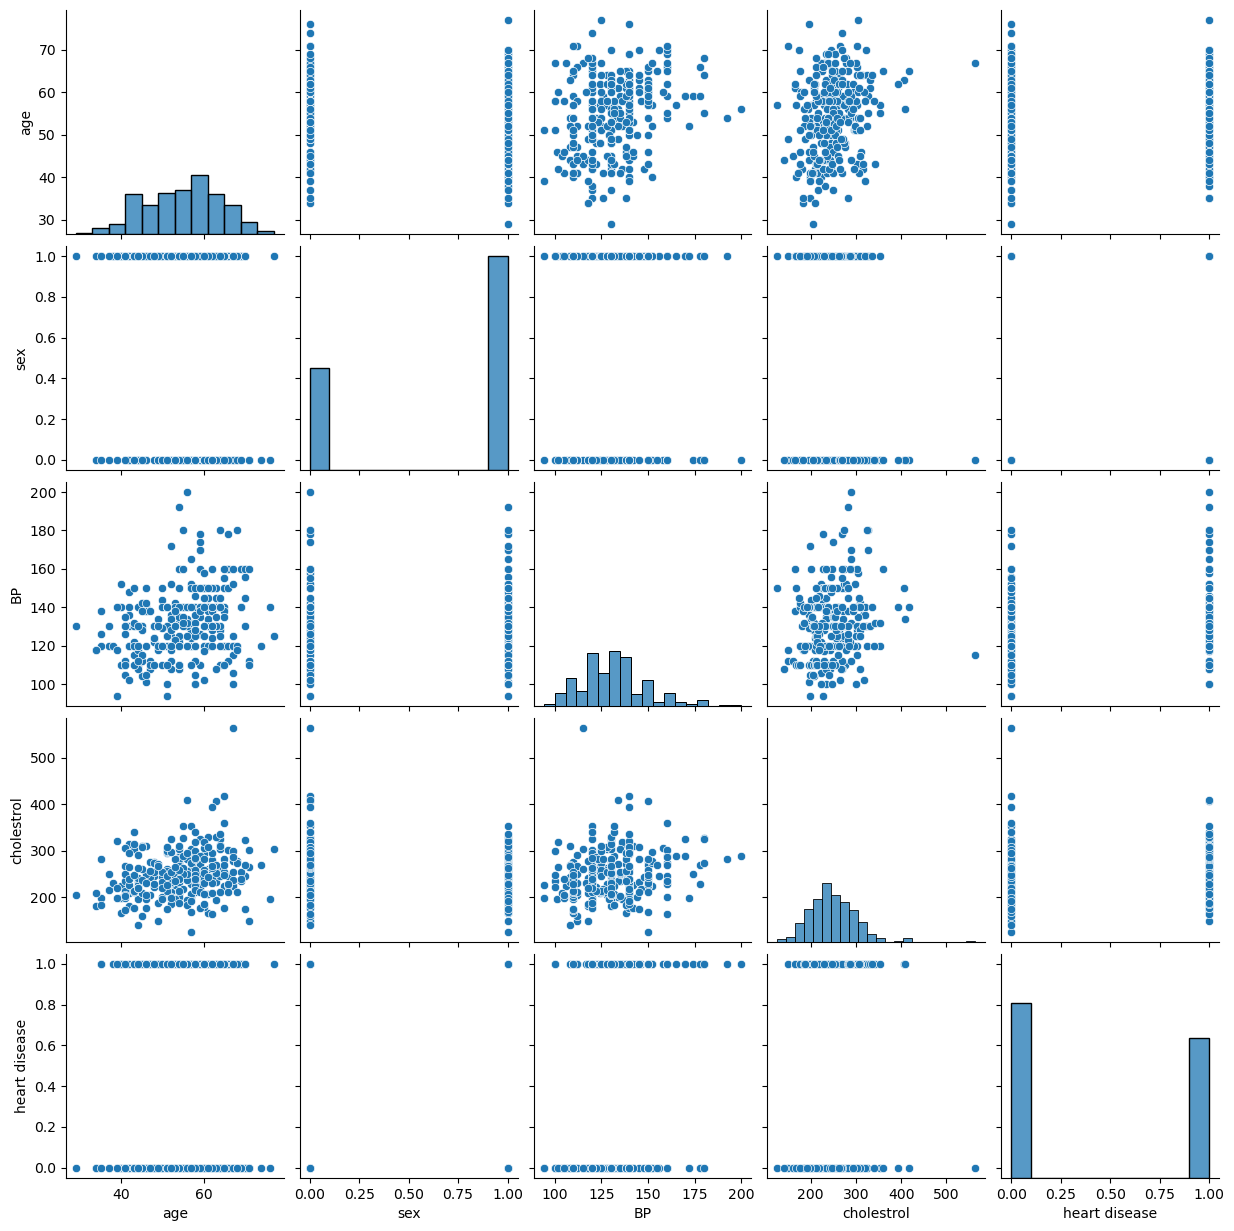

In [93]:
sns.pairplot(df)

In [94]:
y = df['heart disease']
X = df.drop('heart disease', axis=1)

In [95]:
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

In [96]:
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(270, 4) (270,)
(189, 4) (81, 4) (189,) (81,)


In [97]:
X_train.describe()

,age,sex,BP,cholestrol
count,189.000000,189.000000,189.000000,189.000000
mean,54.751323,0.693122,131.809524,251.529101
std,9.132393,0.462423,17.952233,52.554890
min,29.000000,0.000000,94.000000,141.000000
25%,48.000000,0.000000,120.000000,215.000000
50%,56.000000,1.000000,130.000000,244.000000
75%,62.000000,1.000000,140.000000,282.000000
max,74.000000,1.000000,200.000000,564.000000


In [98]:
X_test.describe()

,age,sex,BP,cholestrol
count,81.000000,81.000000,81.000000,81.000000
mean,53.691358,0.641975,130.259259,245.296296
std,9.067307,0.482407,17.711421,49.644094
min,35.000000,0.000000,94.000000,126.000000
25%,46.000000,0.000000,120.000000,208.000000
50%,54.000000,1.000000,130.000000,249.000000
75%,59.000000,1.000000,140.000000,273.000000
max,77.000000,1.000000,192.000000,407.000000


In [99]:
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

In [100]:
X_train_scaled.describe()

,age,sex,BP,cholestrol
count,189.000000,189.000000,189.000000,189.000000
mean,0.572252,0.693122,0.356694,0.261298
std,0.202942,0.462423,0.169361,0.124243
min,0.000000,0.000000,0.000000,0.000000
25%,0.422222,0.000000,0.245283,0.174941
50%,0.600000,1.000000,0.339623,0.243499
75%,0.733333,1.000000,0.433962,0.333333
max,1.000000,1.000000,1.000000,1.000000


In [101]:
X_test_scaled.describe()

,age,sex,BP,cholestrol
count,81.000000,81.000000,81.000000,81.000000
mean,0.445032,0.641975,0.369992,0.424542
std,0.215888,0.482407,0.180729,0.176669
min,0.000000,0.000000,0.000000,0.000000
25%,0.261905,0.000000,0.265306,0.291815
50%,0.452381,1.000000,0.367347,0.437722
75%,0.571429,1.000000,0.469388,0.523132
max,1.000000,1.000000,1.000000,1.000000


In [102]:
from sklearn.tree import DecisionTreeClassifier

In [103]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [104]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

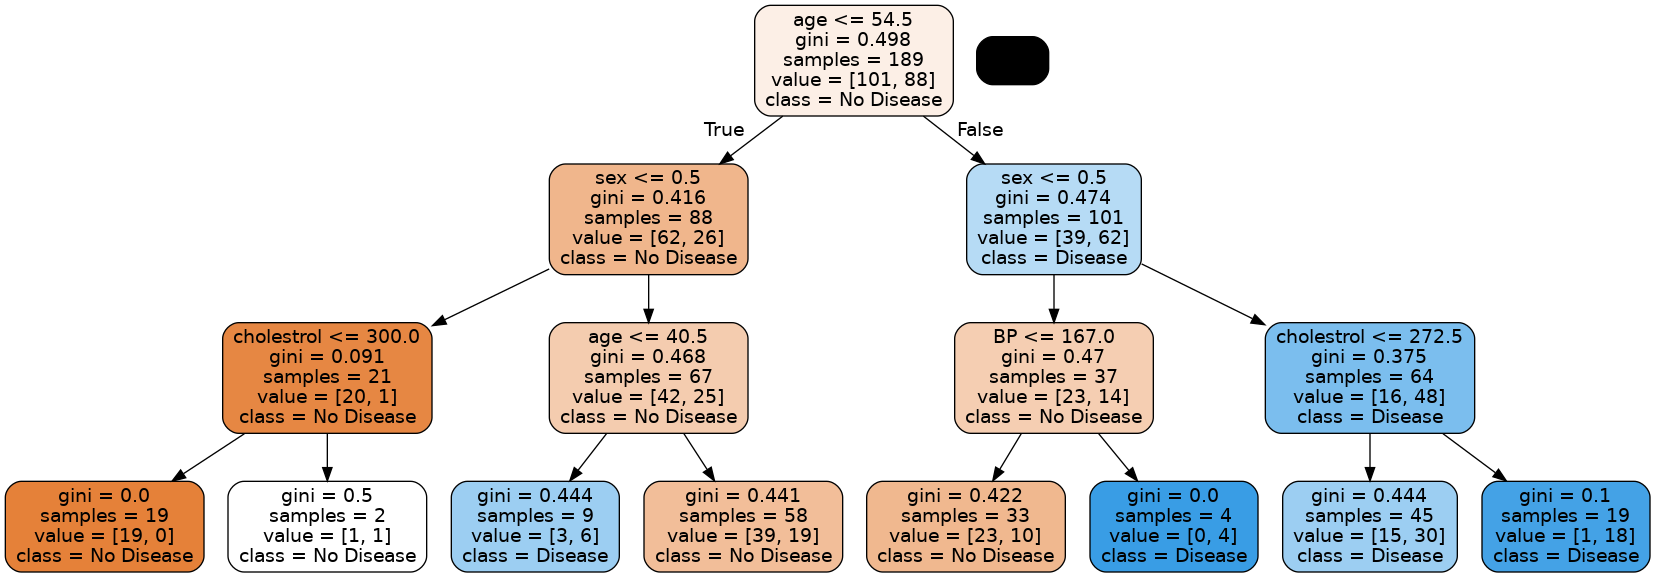

In [105]:
dot_data = StringIO()

export_graphviz(dt, out_file = dot_data, filled = True, rounded=True, feature_names=X_train.columns, class_names = ['No Disease', 'Disease'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [106]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [107]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [108]:
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.7407407407407407
0.6049382716049383


In [109]:
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[82 19]
 [30 58]]
[[35 14]
 [18 14]]


In [110]:
## Hyper parameter

In [111]:
# creating helper functions

In [112]:
def analyze_dt(dt_model):
    dt_model.fit(X_train, y_train)
    dot_data = StringIO()
    export_graphviz(dt_model, out_file = dot_data, filled = True, rounded=True, feature_names=X_train.columns, class_names = ['No Disease', 'Disease'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    y_train_pred = dt.predict(X_train)
    y_test_pred = dt.predict(X_test)
    print("Train accuracy")
    print(accuracy_score(y_train, y_train_pred))
    print(confusion_matrix(y_train, y_train_pred))
    print("-"*50)
    print("Test accuracy")
    print(accuracy_score(y_test, y_test_pred))
    print(confusion_matrix(y_test, y_test_pred))
    print("-"*75)
    print("Train Classification Report")
    print(classification_report(y_train, dt_model.predict(X_train)))
    print("Test Classification Report")
    print(classification_report(y_test, dt_model.predict(X_test)))
    return graph

Train accuracy
0.7407407407407407
[[82 19]
 [30 58]]
--------------------------------------------------
Test accuracy
0.6049382716049383
[[35 14]
 [18 14]]
---------------------------------------------------------------------------
Train Classification Report
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       101
           1       0.75      0.66      0.70        88

    accuracy                           0.74       189
   macro avg       0.74      0.74      0.74       189
weighted avg       0.74      0.74      0.74       189

Test Classification Report
              precision    recall  f1-score   support

           0       0.66      0.71      0.69        49
           1       0.50      0.44      0.47        32

    accuracy                           0.60        81
   macro avg       0.58      0.58      0.58        81
weighted avg       0.60      0.60      0.60        81



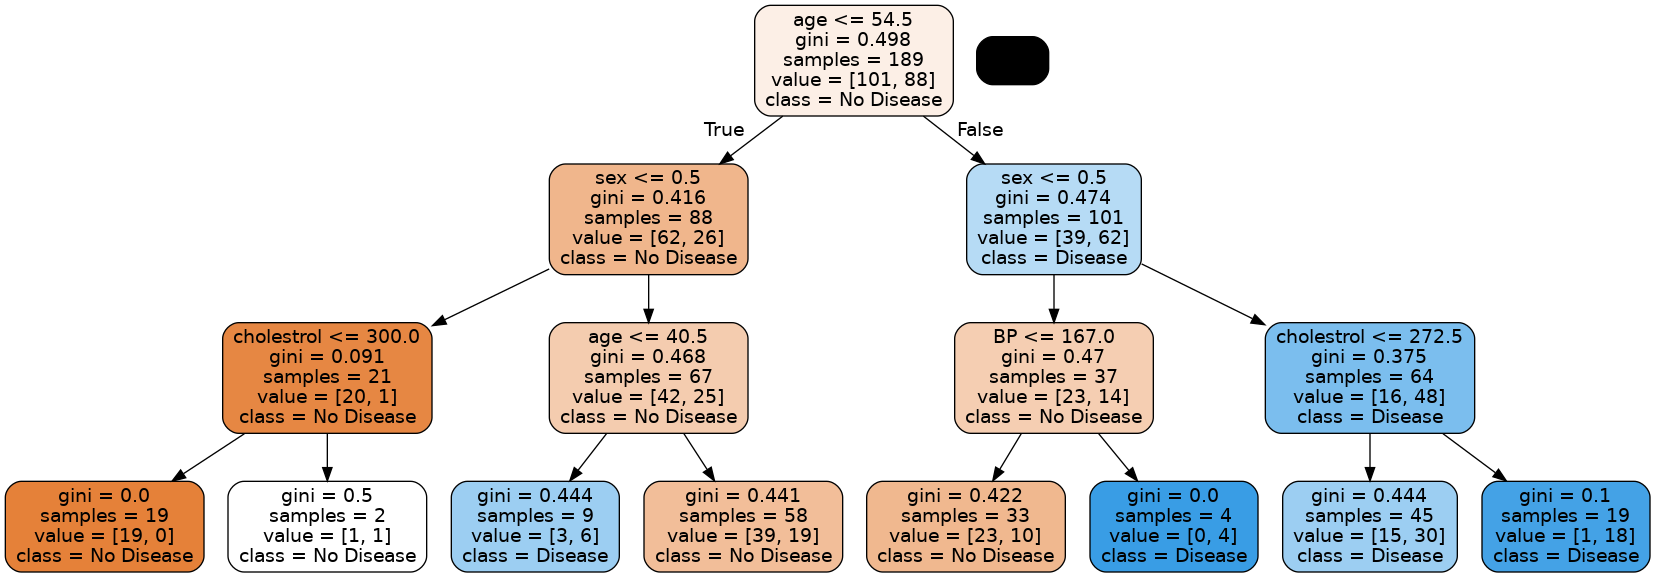

In [113]:
Image(analyze_dt(dt).create_png())

Train accuracy
0.7407407407407407
[[82 19]
 [30 58]]
--------------------------------------------------
Test accuracy
0.6049382716049383
[[35 14]
 [18 14]]
---------------------------------------------------------------------------
Train Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00        88

    accuracy                           1.00       189
   macro avg       1.00      1.00      1.00       189
weighted avg       1.00      1.00      1.00       189

Test Classification Report
              precision    recall  f1-score   support

           0       0.72      0.63      0.67        49
           1       0.53      0.62      0.57        32

    accuracy                           0.63        81
   macro avg       0.62      0.63      0.62        81
weighted avg       0.64      0.63      0.63        81



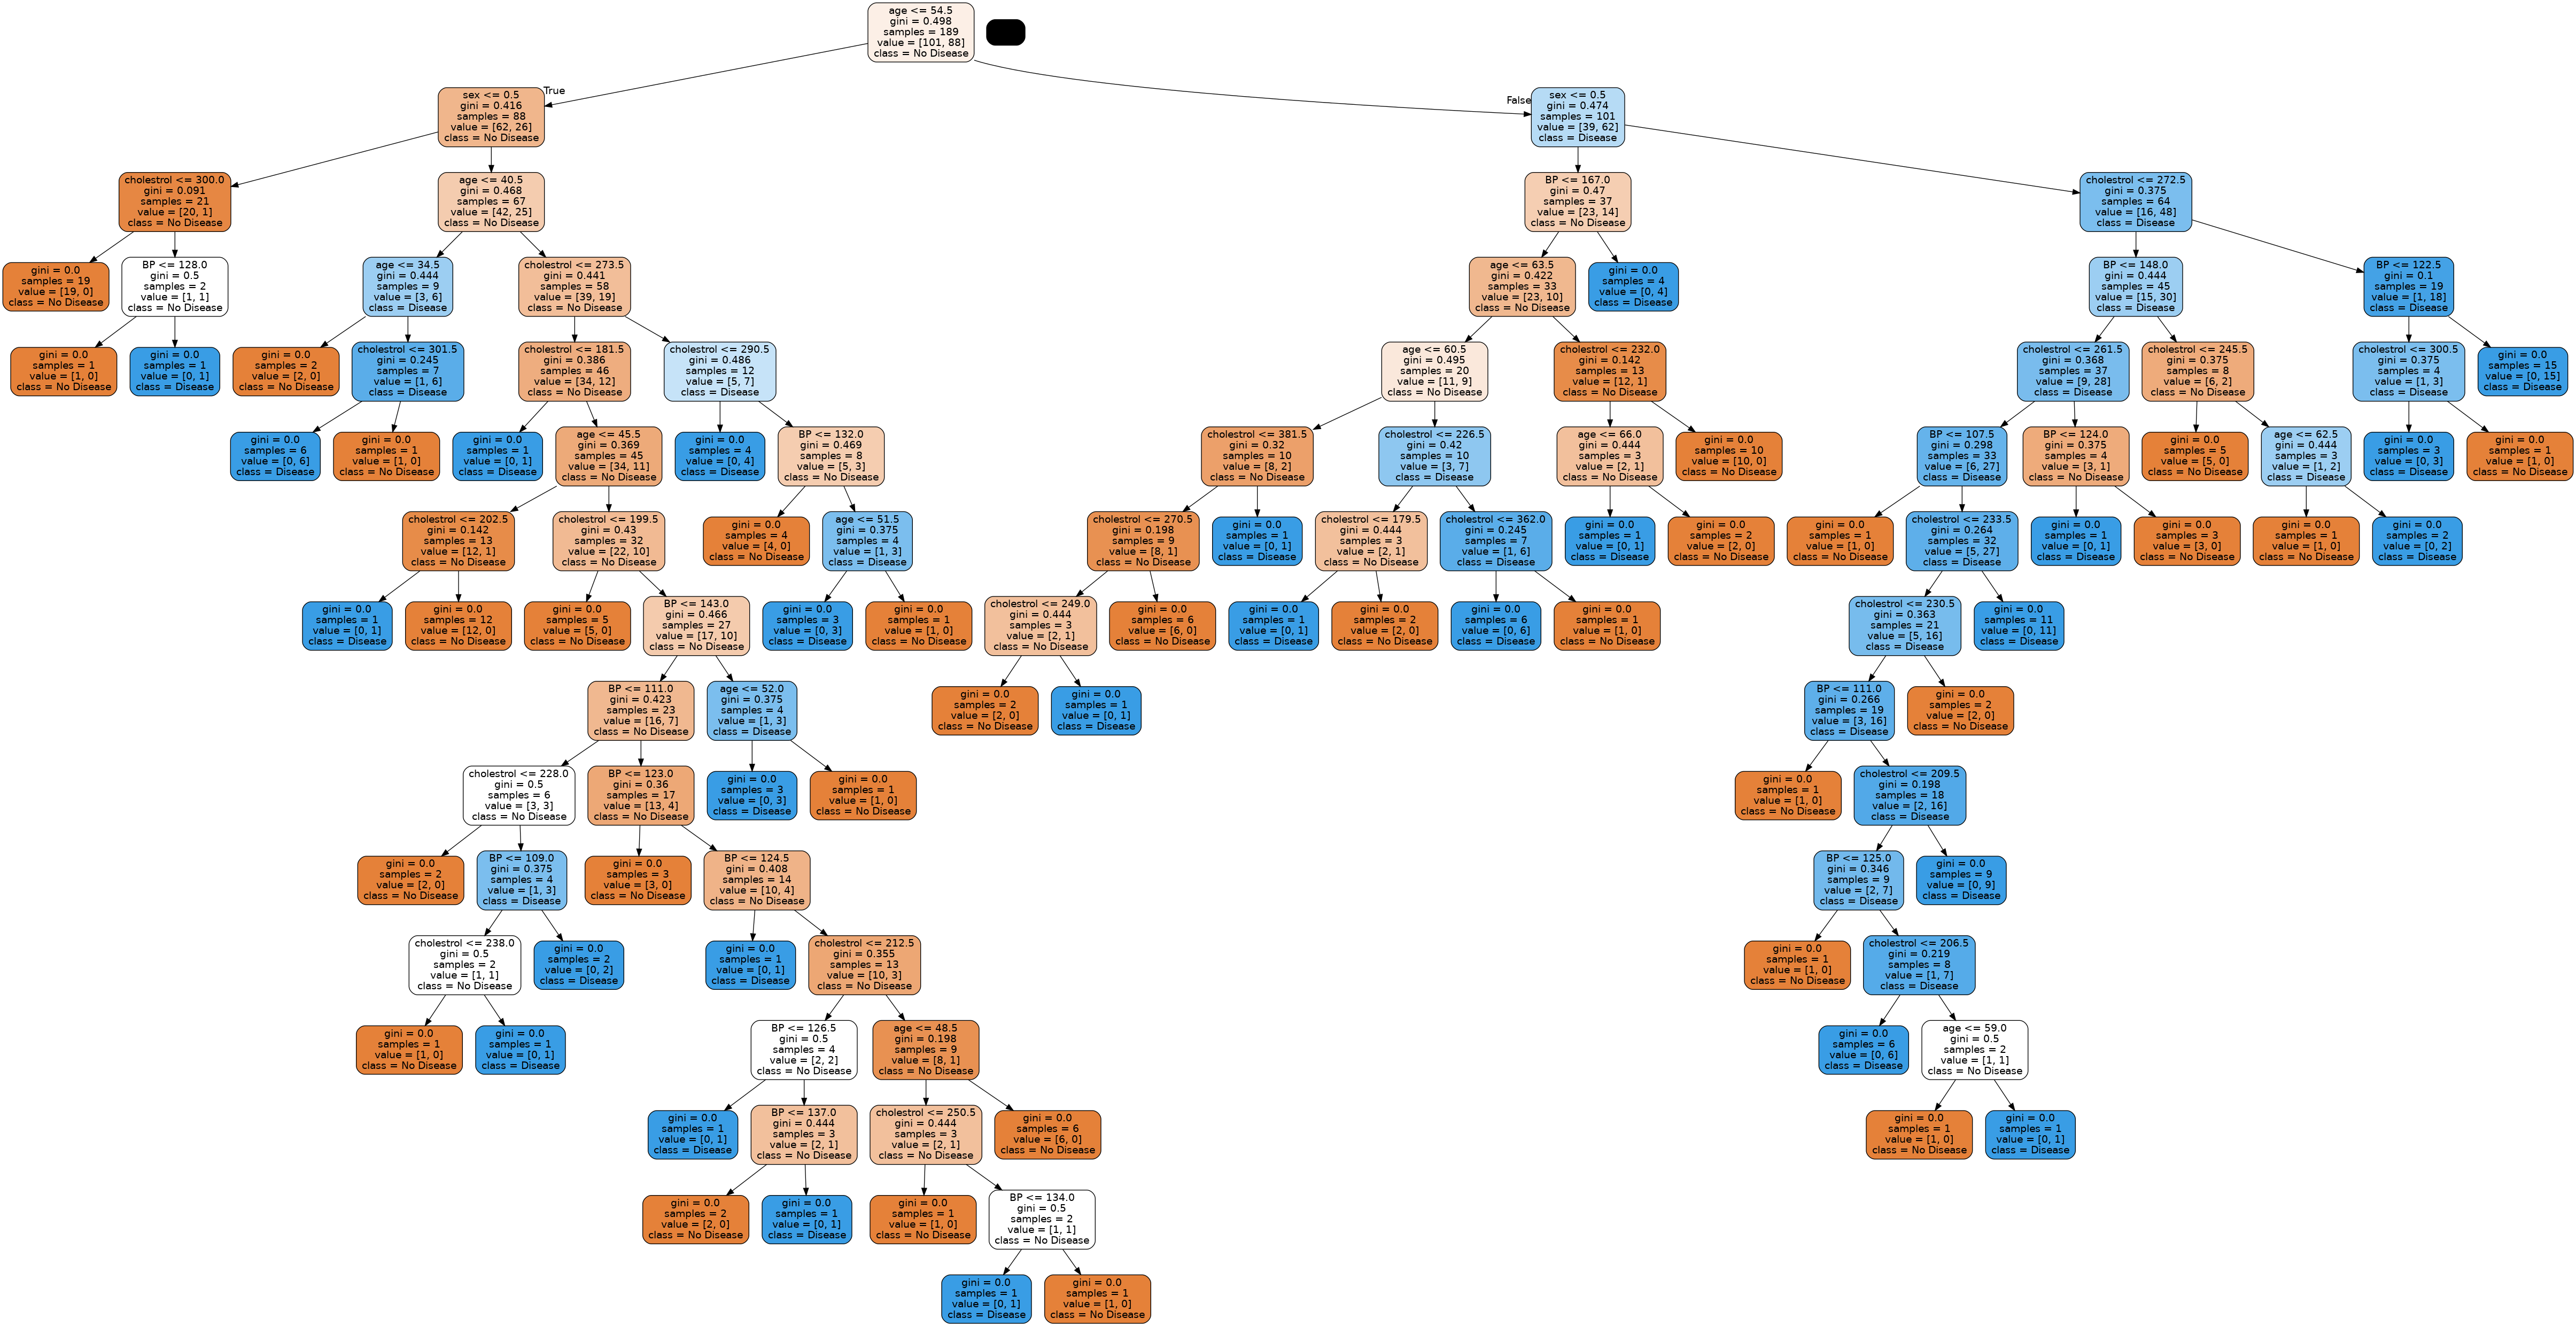

In [114]:
# Type 1 - No hyper param
dt_model_no_hyper_param = DecisionTreeClassifier(random_state=42)
Image(analyze_dt(dt_model_no_hyper_param).create_png())
#notice:
# train accruay is 100 and test accracy is 64.
# it is overfit

Train accuracy
0.7407407407407407
[[82 19]
 [30 58]]
--------------------------------------------------
Test accuracy
0.6049382716049383
[[35 14]
 [18 14]]
---------------------------------------------------------------------------
Train Classification Report
              precision    recall  f1-score   support

           0       0.85      0.92      0.89       101
           1       0.90      0.82      0.86        88

    accuracy                           0.87       189
   macro avg       0.88      0.87      0.87       189
weighted avg       0.87      0.87      0.87       189

Test Classification Report
              precision    recall  f1-score   support

           0       0.71      0.69      0.70        49
           1       0.55      0.56      0.55        32

    accuracy                           0.64        81
   macro avg       0.63      0.63      0.63        81
weighted avg       0.64      0.64      0.64        81



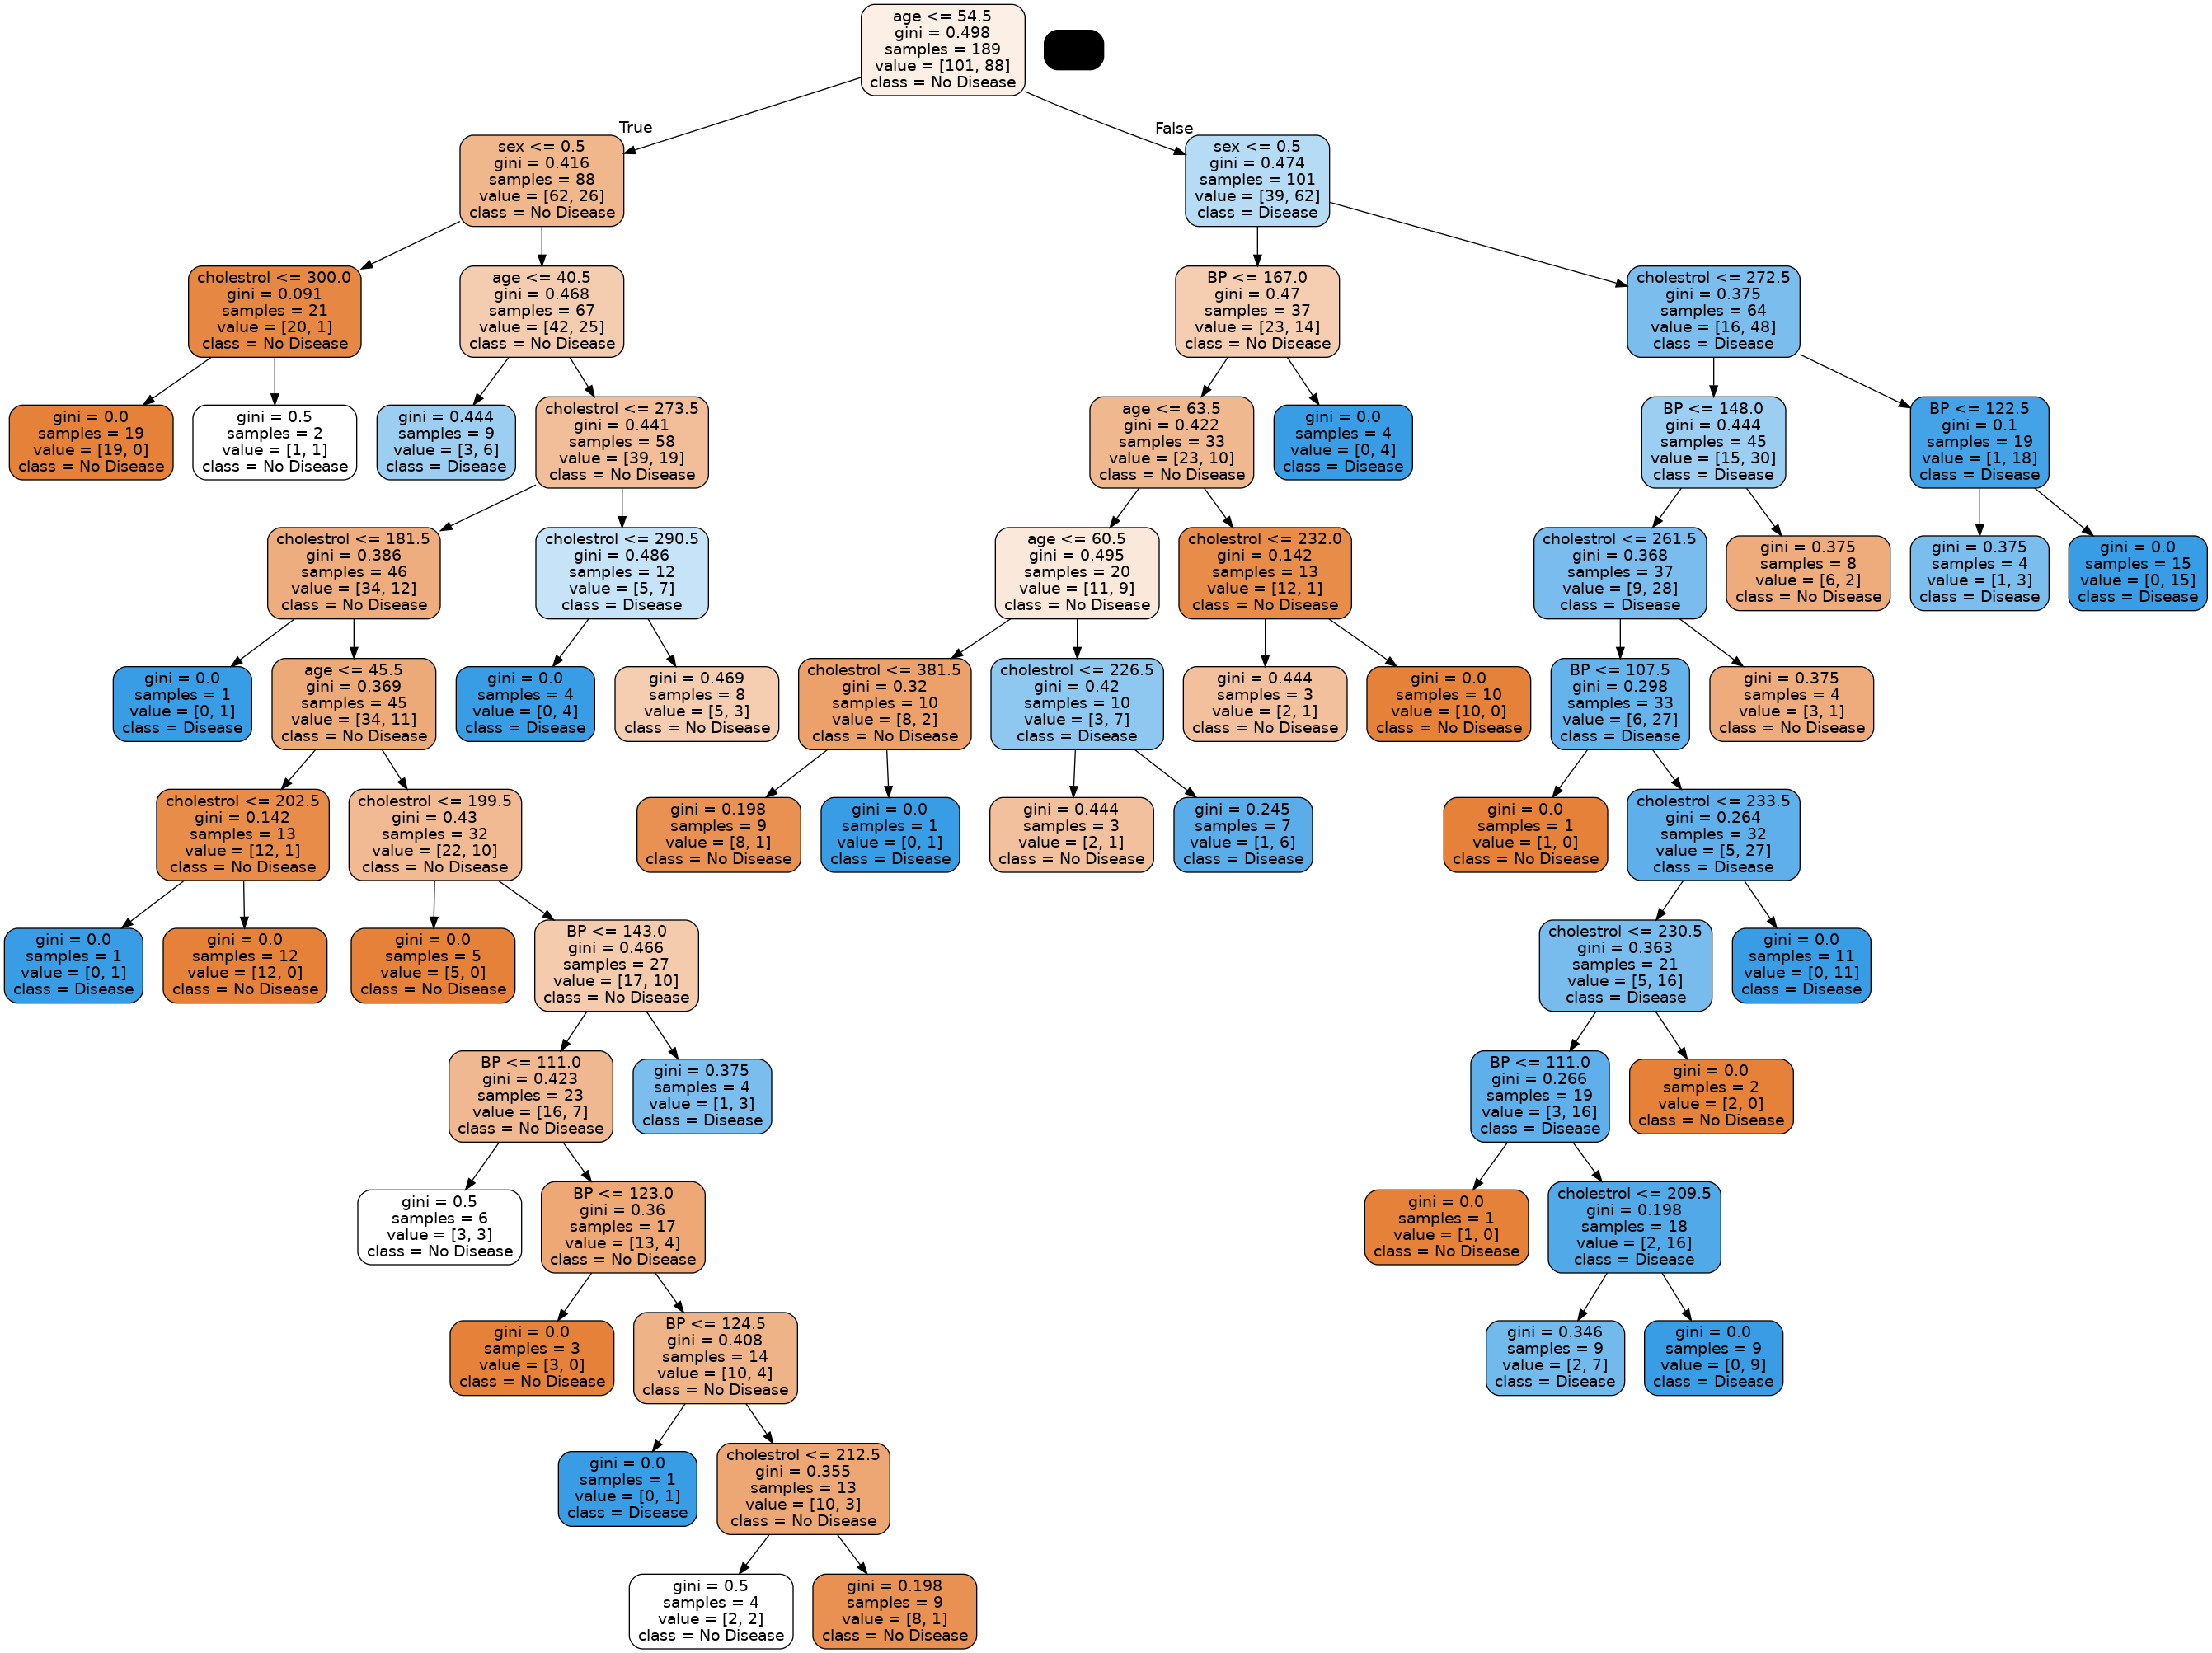

In [115]:
# Type 2 - min_samples_split - only split the node if the node have min 10
dt_model_min_samples_split =  DecisionTreeClassifier(min_samples_split=10, random_state=42)
Image(analyze_dt(dt_model_min_samples_split).create_png())
#notice:
# train accruay is 100 and test accracy is 64.
# it is overfit

Train accuracy
0.7407407407407407
[[82 19]
 [30 58]]
--------------------------------------------------
Test accuracy
0.6049382716049383
[[35 14]
 [18 14]]
---------------------------------------------------------------------------
Train Classification Report
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       101
           1       0.75      0.68      0.71        88

    accuracy                           0.75       189
   macro avg       0.75      0.74      0.74       189
weighted avg       0.75      0.75      0.74       189

Test Classification Report
              precision    recall  f1-score   support

           0       0.73      0.71      0.72        49
           1       0.58      0.59      0.58        32

    accuracy                           0.67        81
   macro avg       0.65      0.65      0.65        81
weighted avg       0.67      0.67      0.67        81



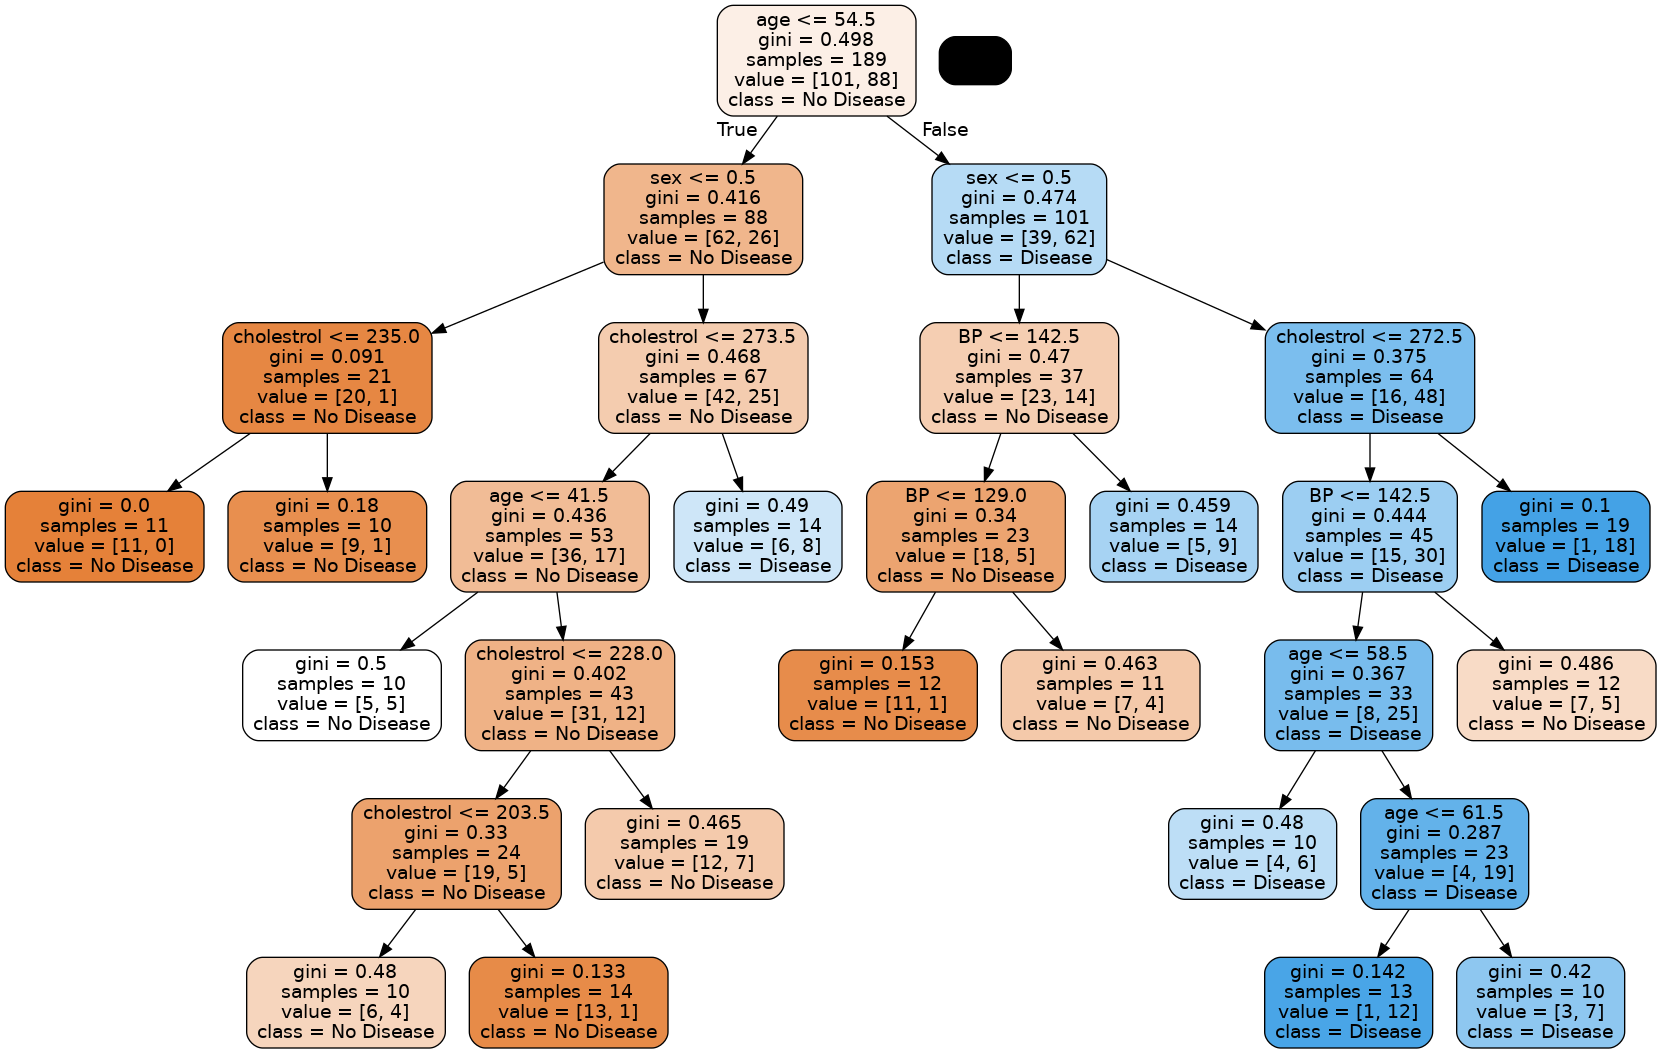

In [116]:
# Type 3 - min_samples_leaf - only split the node if the children nodes have min 10 after splitting
dt_model_min_samples_leaf =  DecisionTreeClassifier(min_samples_leaf=10, random_state=42)
Image(analyze_dt(dt_model_min_samples_leaf).create_png())
#notice:
# train accruay is 100 and test accracy is 64.
# it is overfit

Train accuracy
0.7407407407407407
[[82 19]
 [30 58]]
--------------------------------------------------
Test accuracy
0.6049382716049383
[[35 14]
 [18 14]]
---------------------------------------------------------------------------
Train Classification Report
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       101
           1       0.77      0.70      0.73        88

    accuracy                           0.76       189
   macro avg       0.76      0.76      0.76       189
weighted avg       0.76      0.76      0.76       189

Test Classification Report
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        49
           1       0.62      0.62      0.62        32

    accuracy                           0.70        81
   macro avg       0.69      0.69      0.69        81
weighted avg       0.70      0.70      0.70        81



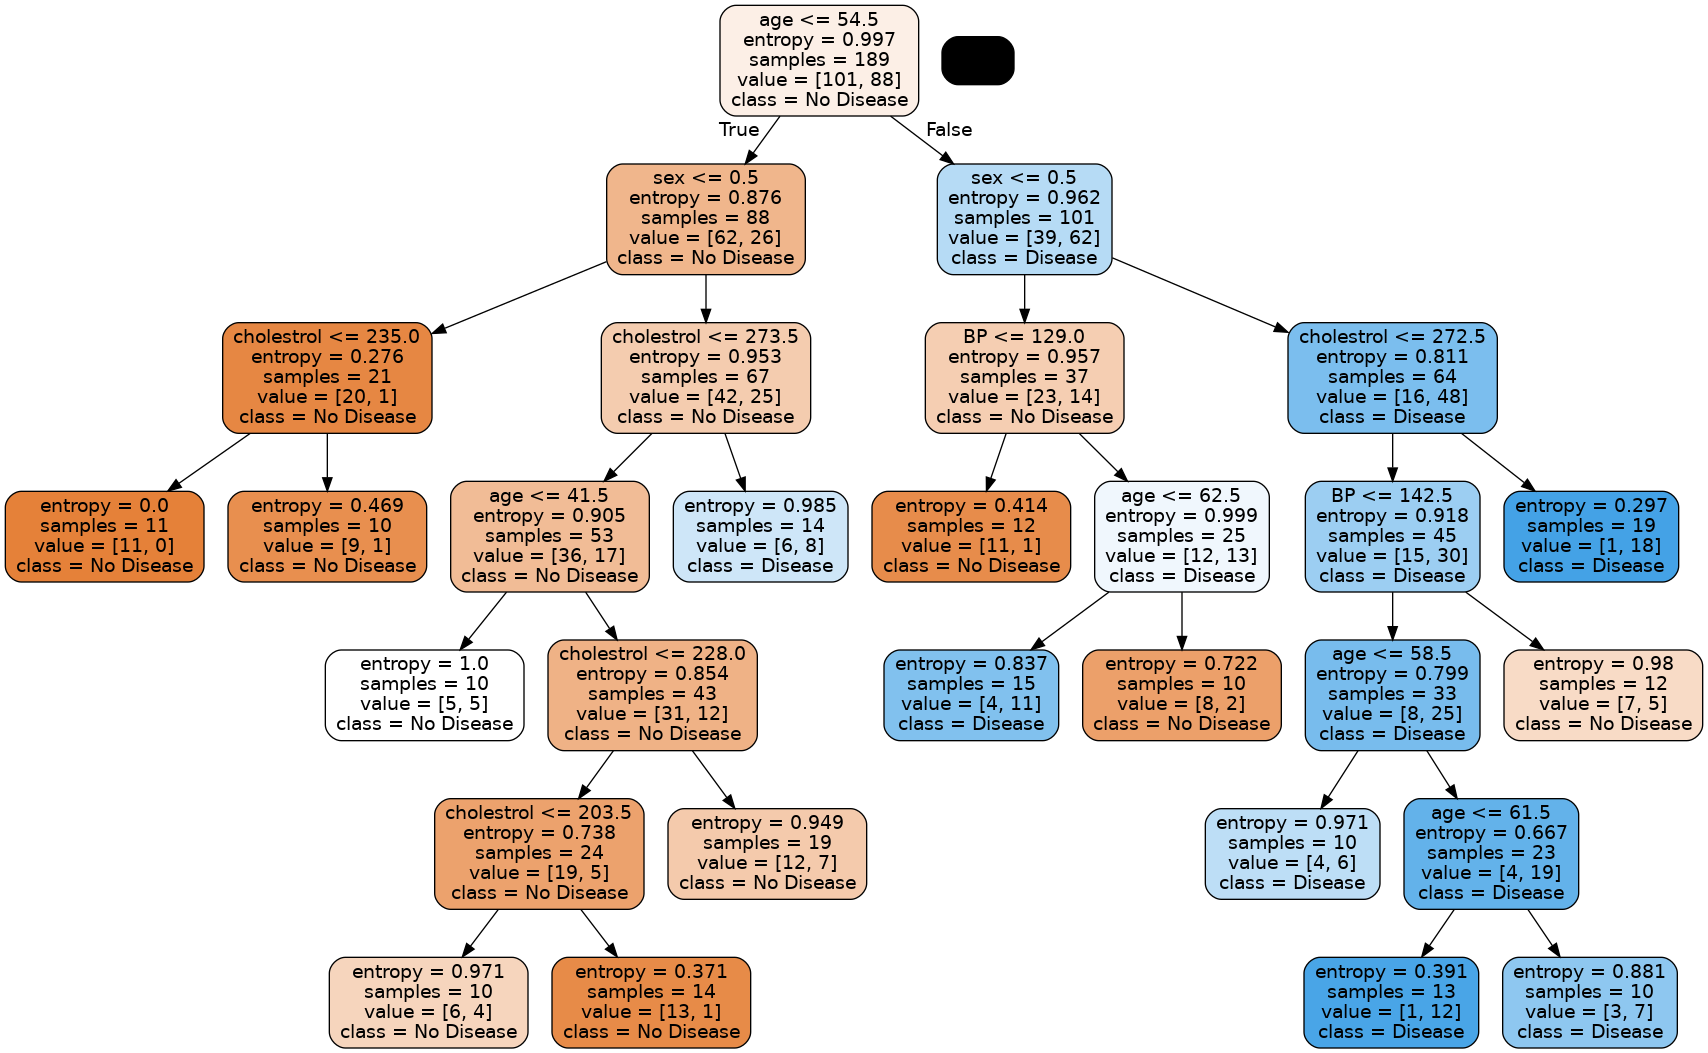

In [117]:
# Type 3 - min_samples_leaf - only split the node if the children nodes have min 10 after splitting
# Type 4 = Type 3 + use entropy
dt_model_min_samples_leaf_ent =  DecisionTreeClassifier(min_samples_leaf=10, random_state=42, criterion="entropy")
Image(analyze_dt(dt_model_min_samples_leaf_ent).create_png())

In [118]:
# Hyper parameter tuning

In [119]:
from sklearn.model_selection import GridSearchCV

In [120]:
dt_cv = DecisionTreeClassifier(random_state=42)
params = {
     'max_depth' : [3,5,7,9,11],
    'min_samples_leaf' : [3,5,10,20,50,100,200],
    'criterion' : ["entropy", "gini"]
}
grid_search = GridSearchCV(estimator=dt_cv, param_grid=params, scoring='accuracy', n_jobs=-1, cv=4, verbose=1,)

In [121]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 70 candidates, totalling 280 fits
CPU times: user 921 ms, sys: 5.53 ms, total: 927 ms
Wall time: 5.62 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'min_samples_leaf': [3, 5, 10, 20, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [122]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.031418,0.012067,0.020827,0.011743,entropy,3,3,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.604167,0.744681,0.617021,0.680851,0.661680,0.056033,3
1,0.047054,0.023968,0.017722,0.017587,entropy,3,5,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.604167,0.765957,0.617021,0.680851,0.666999,0.064090,1
2,0.034662,0.033940,0.024011,0.012730,entropy,3,10,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.625000,0.744681,0.595745,0.680851,0.661569,0.056898,4
3,0.013688,0.013666,0.010681,0.011127,entropy,3,20,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.666667,0.744681,0.617021,0.531915,0.640071,0.077265,27
4,0.010026,0.008785,0.010937,0.007040,entropy,3,50,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,10


In [123]:
score_df.nlargest(5, 'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
1,0.047054,0.023968,0.017722,0.017587,entropy,3,5,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.604167,0.765957,0.617021,0.680851,0.666999,0.064090,1
37,0.008862,0.002809,0.004167,0.004083,gini,3,10,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.645833,0.744681,0.595745,0.680851,0.666777,0.054202,2
0,0.031418,0.012067,0.020827,0.011743,entropy,3,3,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.604167,0.744681,0.617021,0.680851,0.661680,0.056033,3
2,0.034662,0.033940,0.024011,0.012730,entropy,3,10,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.625000,0.744681,0.595745,0.680851,0.661569,0.056898,4
36,0.008053,0.000912,0.005597,0.002784,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.625000,0.744681,0.595745,0.659574,0.656250,0.055831,5


In [124]:
 grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=42)

In [125]:
best = grid_search.best_estimator_

Train accuracy
0.7407407407407407
[[82 19]
 [30 58]]
--------------------------------------------------
Test accuracy
0.6049382716049383
[[35 14]
 [18 14]]
---------------------------------------------------------------------------
Train Classification Report
              precision    recall  f1-score   support

           0       0.71      0.81      0.76       101
           1       0.74      0.61      0.67        88

    accuracy                           0.72       189
   macro avg       0.72      0.71      0.71       189
weighted avg       0.72      0.72      0.72       189

Test Classification Report
              precision    recall  f1-score   support

           0       0.67      0.73      0.70        49
           1       0.52      0.44      0.47        32

    accuracy                           0.62        81
   macro avg       0.59      0.59      0.59        81
weighted avg       0.61      0.62      0.61        81



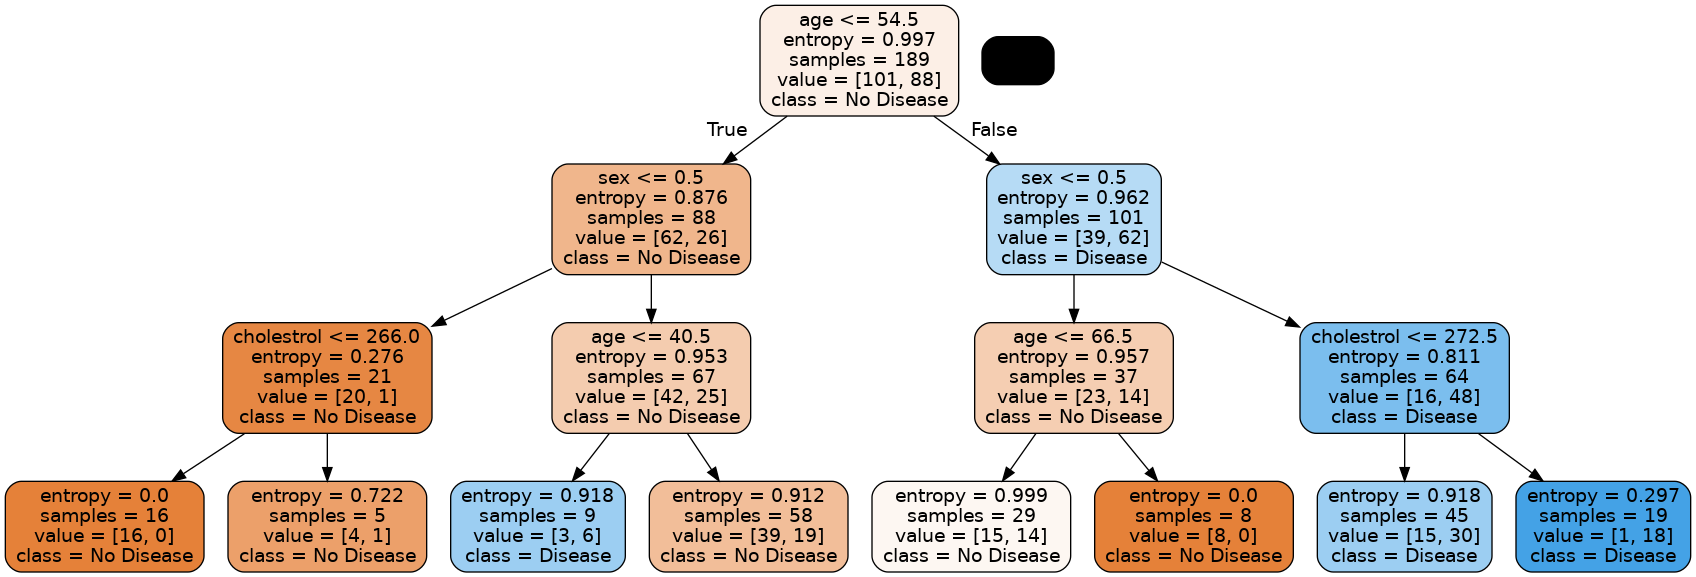

In [126]:
# Type 5 - using grid search cv
Image(analyze_dt(best).create_png())